In [1]:
#IPython is what you are using now to run the notebook
import IPython
print( "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with arrays and matrices
import numpy as np
print( "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print( "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print( "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib.pyplot as plt  
from pylab import *
print( "Mapltolib version:    %6.6s (need at least 1.2.1)" %
       matplotlib.__version__)
%matplotlib inline
# necessary for in-line graphics

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print( "Scikit-Learn version: %6.6s (need at least 0.13.1)" %
       sklearn.__version__)
import os
# for certain system-related functions

IPython version:       7.6.1 (need at least 1.0)
Numpy version:        1.16.4 (need at least 1.7.1)
SciPy version:         1.2.1 (need at least 0.12.0)
Pandas version:       0.24.2 (need at least 0.11.0)
Mapltolib version:     3.1.0 (need at least 1.2.1)
Scikit-Learn version: 0.21.2 (need at least 0.13.1)


In [2]:
"""
1.1 Load data crazy-hat.tsv. Inspect it.
"""

'\n1.1 Load data crazy-hat.tsv. Inspect it.\n'

In [3]:
#We load the tsv file, tab is seperator
crazyhat = pd.read_csv('crazy-hat.tsv',sep="\t")


In [4]:
#We convert to a dataframe
crazyhat_df = pd.DataFrame(crazyhat)

In [5]:
crazyhat_df

,x,y,group
0,0,22,outline
1,16,-18,outline
2,-16,-18,outline
3,0,22,outline
4,-3,7,leye
5,-3,14,leye
6,2,7,reye
7,2,14,reye
8,-11,-10,mouth
9,-7,-17,mouth


In [6]:
"""
There are 14 rows and 3 columns. The columns x ad y tell the x and y coordinates. The column group tells outline, left eye, right eye, mouth.
"""

'\nThere are 14 rows and 3 columns. The columns x ad y tell the x and y coordinates. The column group tells outline, left eye, right eye, mouth.\n'

In [7]:
"""1.2 Plot Crazy Hat (no rotation here).
"""

'1.2 Plot Crazy Hat (no rotation here).\n'

In [8]:
#making a dictionary of colours
colors_dict = {"outline":"black", "leye":"brown", "reye":"brown", "mouth":"red"}

#making a dictionary of width
linewidth_dict= {"outline":2, "leye":2, "reye":2, "mouth":4}

In [9]:
"""I would create a function that would do everything
"""

'I would create a function that would do everything\n'

In [10]:
#function for drawing crazy hat
"""
This function takes in 4 arguments- dataframe of x and y cordinates of hat, dictionary of colours, dictionary of linewidth, angle to rotate in degree
"""
def draw_crazyhat(crazyhat_df, colors_dictionary, linewidth_dictionary,angle):
    
    #creating the rotation matrix
    theta = np.radians(angle)
    c = np.cos(theta)
    s = np.sin(theta)
    R = np.array(((c,-s), (s, c)))
        #plotting the image
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_aspect('equal')
    
    #plotting the outline
    Outline = crazyhat_df[crazyhat_df["group"] =="outline"]
    Outline = Outline.iloc[:,0:2]
    O = Outline @ R
    ax.plot(O.iloc[:,0],O.iloc[:,1],c=colors_dictionary["outline"],linewidth = linewidth_dictionary["outline"])
    
     #plotting the Lefteye
    Lefteye = crazyhat_df[crazyhat_df["group"] =="leye"]
    Lefteye = Lefteye.iloc[:,0:2]
    Le = Lefteye @ R
    ax.plot(Le.iloc[:,0],Le.iloc[:,1],c=colors_dictionary["leye"],linewidth = linewidth_dictionary["leye"])
    
    #plotting the Righteye
    Righteye = crazyhat_df[crazyhat_df["group"] =="reye"]
    Righteye = Righteye.iloc[:,0:2]
    Re = Righteye @ R
    ax.plot(Re.iloc[:,0],Re.iloc[:,1],c=colors_dictionary["reye"],linewidth = linewidth_dictionary["reye"])
    
    #plotting the Mouth
    Mouth = crazyhat_df[crazyhat_df["group"] =="mouth"]
    Mouth = Mouth.iloc[:,0:2]
    M = Mouth @ R
    ax.plot(M.iloc[:,0],M.iloc[:,1],c=colors_dictionary["mouth"],linewidth = linewidth_dictionary["mouth"])
    plt.show()
    
    
   



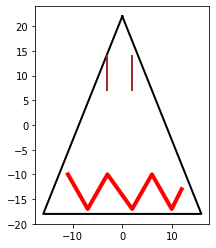

In [11]:
#rotationg through 0 degree. We call the draw crazy hat function, and the parameters passed are x and y cordinates of hat, dictionary of colours, dictionary of linewidth and angle 0 degree
draw_crazyhat(crazyhat_df, colors_dict, linewidth_dict,0)

In [12]:
"""1.3 Now rotate Crazy hat 66 degree counterclockwise (and plot it).
"""

'1.3 Now rotate Crazy hat 66 degree counterclockwise (and plot it).\n'

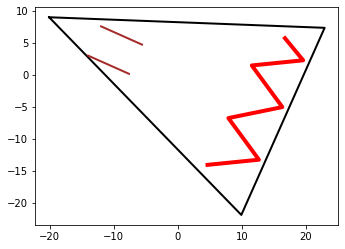

In [13]:
#rotationg through 0 degree. We call the draw crazy hat function, and the parameters passed are x and y cordinates of hat, dictionary of colours, dictionary of linewidth and angle -66 degree
draw_crazyhat(crazyhat_df, colors_dict, linewidth_dict,-66)

In [14]:
"""2.1 Construct the ip-x matrix Fx that ips (mirrors) the image
on y axis.
"""

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\inputtransformer2.py:481: UserWarning: `make_tokens_by_line` received a list of lines which do not have lineending markers ('\n', '\r', '\r\n', '\x0b', '\x0c'), behavior will be unspecified
  warnings.warn("`make_tokens_by_line` received a list of lines which do not have lineending markers ('\\n', '\\r', '\\r\\n', '\\x0b', '\\x0c'), behavior will be unspecified")


'2.1 Construct the \x10\x1dip-x\x11 matrix Fx that \x1dips (mirrors) the image\non y axis.\n'

In [15]:
#We want to get mirror image around the Y axis. so we want the Y coorsdinates untouched, and change the sign of the X coordinates
Fx = np.array([[-1,0],[0,1]])
Fx

array([[-1,  0],
       [ 0,  1]])

In [16]:
#I am taking mirror image of the inverse 1 that we did in the lab
A = np.array([[0,0],[0,2],[1,1]])

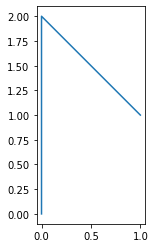

In [17]:
plt.axes().set_aspect('equal')
plt.plot(A[:,0], A[:,1])

In [18]:
FA = A@Fx

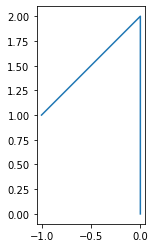

In [19]:
#gettuing mirror image about the Y axis
plt.axes().set_aspect('equal')
plt.plot(FA[:,0], FA[:,1])

In [20]:
# I am flipping the crazy hat around the Y axis

#Our Crazy hat matrix
crazyhat_df

,x,y,group
0,0,22,outline
1,16,-18,outline
2,-16,-18,outline
3,0,22,outline
4,-3,7,leye
5,-3,14,leye
6,2,7,reye
7,2,14,reye
8,-11,-10,mouth
9,-7,-17,mouth


In [21]:
""" I would use the same code as question 1 to draw to plot the crazy hat matrix. I would only multiply groups of outline, leye,reye, mouth with the Fx matrix to get mirror image along the Y axis
"""

' I would use the same code as question 1 to draw to plot the crazy hat matrix. I would only multiply groups of outline, leye,reye, mouth with the Fx matrix to get mirror image along the Y axis\n'

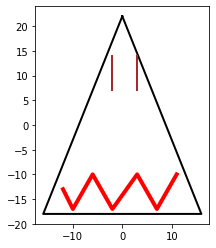

In [22]:
#creating the rotation matrix
theta = np.radians(0) #putting angle as 0 degree because we are not rotating
c = np.cos(theta)
s = np.sin(theta)
R = np.array(((c,-s), (s, c)))
        #plotting the image
    
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
    
    #plotting the outline
Outline = crazyhat_df[crazyhat_df["group"] =="outline"]
Outline = Outline.iloc[:,0:2]
O = Outline @ R
OFx = O @ Fx #multiplying with the Fx matrix
ax.plot(OFx.iloc[:,0],OFx.iloc[:,1],c=colors_dict["outline"],linewidth = linewidth_dict["outline"])
    
     #plotting the Lefteye
Lefteye = crazyhat_df[crazyhat_df["group"] =="leye"]
Lefteye = Lefteye.iloc[:,0:2]
Le = Lefteye @ R
LeFx = Le @ Fx #multiplying with the Fx matrix
ax.plot(LeFx.iloc[:,0],LeFx.iloc[:,1],c=colors_dict["leye"],linewidth = linewidth_dict["leye"])
    
    #plotting the Righteye
Righteye = crazyhat_df[crazyhat_df["group"] =="reye"]
Righteye = Righteye.iloc[:,0:2]
Re = Righteye @ R
ReFx = Re @ Fx #multiplying with the Fx matrix
ax.plot(ReFx.iloc[:,0],ReFx.iloc[:,1],c=colors_dict["reye"],linewidth = linewidth_dict["reye"])
    
    #plotting the Mouth
Mouth = crazyhat_df[crazyhat_df["group"] =="mouth"]
Mouth = Mouth.iloc[:,0:2]
M = Mouth @ R
MFx = M @ Fx #multiplying with the Fx matrix
ax.plot(MFx.iloc[:,0],MFx.iloc[:,1],c=colors_dict["mouth"],linewidth = linewidth_dict["mouth"])
plt.show()


In [23]:
#This is a mirror image of the crazy hat on y axis. You might not find it different because the hat is symmetrical about the y axis.

In [24]:
"""2.2 Create the stretch-y matrix Sy(s).
"""

'2.2 Create the \x10stretch-y\x11 matrix Sy(s).\n'

In [25]:
#We have to stretch the Y corrdinates 2 amount
Sy = np.array([[1,0],[0,2]])
Sy

array([[1, 0],
       [0, 2]])

In [26]:
#Lets stretch the inverse 1 we drew in the lab
SA = A @ Sy

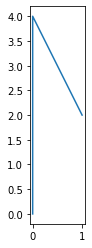

In [27]:
#stretchiong along te Y axis
plt.axes().set_aspect('equal')
plt.plot(SA[:,0], SA[:,1])

In [28]:
"""
We would now stretch the crazy hat. I would use the code of question 1. I would only multiply groups of outline, leye,reye, mouth with the Sy matrix to get mirror image along the Y axis
"""

'\nWe would now stretch the crazy hat. I would use the code of question 1. I would only multiply groups of outline, leye,reye, mouth with the Sy matrix to get mirror image along the Y axis\n'

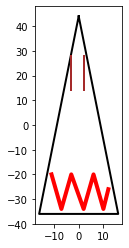

In [29]:
#creating the rotation matrix
theta = np.radians(0) #putting angle as 0 degree because we are not rotating
c = np.cos(theta)
s = np.sin(theta)
R = np.array(((c,-s), (s, c)))
        #plotting the image
    
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
    
    #plotting the outline
Outline = crazyhat_df[crazyhat_df["group"] =="outline"]
Outline = Outline.iloc[:,0:2]
O = Outline @ R
OSy = O @ Sy #multiplying with the Fx matrix
ax.plot(OSy.iloc[:,0],OSy.iloc[:,1],c=colors_dict["outline"],linewidth = linewidth_dict["outline"])
    
     #plotting the Lefteye
Lefteye = crazyhat_df[crazyhat_df["group"] =="leye"]
Lefteye = Lefteye.iloc[:,0:2]
Le = Lefteye @ R
LeSy = Le @ Sy #multiplying with the Sy matrix
ax.plot(LeSy.iloc[:,0],LeSy.iloc[:,1],c=colors_dict["leye"],linewidth = linewidth_dict["leye"])
    
    #plotting the Righteye
Righteye = crazyhat_df[crazyhat_df["group"] =="reye"]
Righteye = Righteye.iloc[:,0:2]
Re = Righteye @ R
ReSy = Re @ Sy #multiplying with the Fx matrix
ax.plot(ReSy.iloc[:,0],ReSy.iloc[:,1],c=colors_dict["reye"],linewidth = linewidth_dict["reye"])
    
    #plotting the Mouth
Mouth = crazyhat_df[crazyhat_df["group"] =="mouth"]
Mouth = Mouth.iloc[:,0:2]
M = Mouth @ R
MSy = M @ Sy #multiplying with the Fx matrix
ax.plot(MSy.iloc[:,0],MSy.iloc[:,1],c=colors_dict["mouth"],linewidth = linewidth_dict["mouth"])
plt.show()


In [30]:
#We have made the crazy hat twice as tall along the Y axis

In [31]:
"""2.3 Do the following operations after one another: rotate it by 45 degrees counterclockwise, flip it, stretch it 2x, and rotate it back.
"""

'2.3 Do the following operations after one another: rotate it by 45 degrees counterclockwise, flip it, stretch it 2x, and rotate it back.\n'

In [32]:
"""We would now stretch the crazy hat. I would use the code of question 1. I would only multiply groups of outline, leye,reye, mouth with the Fx and Sy matrices to get mirror image along the Y axis
"""

'We would now stretch the crazy hat. I would use the code of question 1. I would only multiply groups of outline, leye,reye, mouth with the Fx and Sy matrices to get mirror image along the Y axis\n'

In [33]:
#cretaing the rotation matrix for rotating 45 degree counter clockwise (-45 degree)
theta_45 = np.radians(-45) #putting angle as 45 degree for rotating
c_45 = np.cos(theta_45)
s_45 = np.sin(theta_45)
R_45 = np.array(((c_45,-s_45), (s_45, c_45)))
       

In [34]:
#creating the matrix to rotate back 45 degree, we name it with the subscript rb

theta_45_rb = np.radians(45) #putting angle as 45 degree for rotating back (rb)
c_45_rb = np.cos(theta_45_rb)
s_45_rb = np.sin(theta_45_rb)
R_45_rb = np.array(((c_45_rb,-s_45_rb), (s_45_rb, c_45_rb)))
        

In [35]:
#We hae the Fx and Sy matrices from earlier, so we do these steps on inverse 1 of the lab
A_steps = A @ R_45 @Fx @Sy @R_45_rb

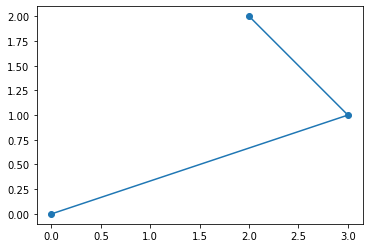

In [36]:
plt.axes().set_aspect('equal')
plt.plot(A_steps[:,0], A_steps[:,1], marker = "o")

In [37]:
total_steps = R_45 @Fx @Sy @R_45_rb
A_total_steps = A @ total_steps
total_steps

array([[0.5, 1.5],
       [1.5, 0.5]])

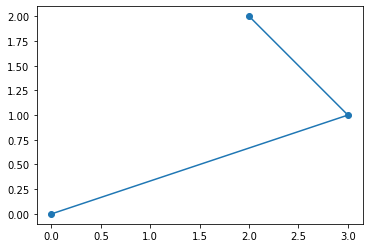

In [38]:
plt.axes().set_aspect('equal')
plt.plot(A_total_steps[:,0], A_total_steps[:,1], marker = "o")

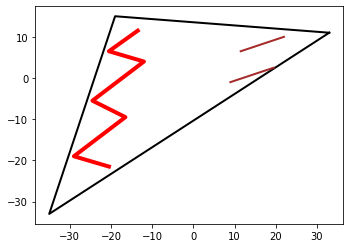

In [40]:
#We would multiply each group to  @R_45 @Fx @Sy @R_45_rb, this would rotate 45 degree counterclockwise, flip it, stretch it and rotate back 45 degree
        #plotting the image
    
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
    
    #plotting the outline
Outline = crazyhat_df[crazyhat_df["group"] =="outline"]
Outline = Outline.iloc[:,0:2]
O = Outline @ R_45 @Fx @Sy @R_45_rb #We are rotating 45 degree counterclockwise, flipping, stretching, rotating back

ax.plot(O.iloc[:,0],O.iloc[:,1],c=colors_dict["outline"],linewidth = linewidth_dict["outline"])
    
     #plotting the Lefteye
Lefteye = crazyhat_df[crazyhat_df["group"] =="leye"]
Lefteye = Lefteye.iloc[:,0:2]
Le = Lefteye @ R_45 @Fx @Sy @R_45_rb #We are rotating 45 degree counterclockwise, flipping, stretching, rotating back

ax.plot(Le.iloc[:,0],Le.iloc[:,1],c=colors_dict["leye"],linewidth = linewidth_dict["leye"])
    
    #plotting the Righteye
Righteye = crazyhat_df[crazyhat_df["group"] =="reye"]
Righteye = Righteye.iloc[:,0:2]
Re = Righteye @ R_45 @Fx @Sy @R_45_rb #We are rotating 45 degree counterclockwise, flipping, stretching, rotating back

ax.plot(Re.iloc[:,0],Re.iloc[:,1],c=colors_dict["reye"],linewidth = linewidth_dict["reye"])
    
    #plotting the Mouth
Mouth = crazyhat_df[crazyhat_df["group"] =="mouth"]
Mouth = Mouth.iloc[:,0:2]
M = Mouth @ R_45 @Fx @Sy @R_45_rb #We are rotating 45 degree counterclockwise, flipping, stretching, rotating back

ax.plot(M.iloc[:,0],M.iloc[:,1],c=colors_dict["mouth"],linewidth = linewidth_dict["mouth"])
plt.show()


In [41]:
"""3.4 Finally, consider all these transformations as a single linear transformation. Print the corresponding transition matrix.
"""

'3.4 Finally, consider all these transformations as a single linear transformation. Print the corresponding transition matrix.\n'

In [42]:
#Transformation Matrix of all the steps
Tm = R_45 @Fx @Sy @R_45_rb
Tm

array([[0.5, 1.5],
       [1.5, 0.5]])

In [43]:
"""3.1 Understand the example code above. Consult documentation of the corresponding functions, and also read Transforming Bitmap Images into Coordinate Matrix Form in the lecture notes (I try to improve the text the next few days).
"""

'3.1 Understand the example code above. Consult documentation of the corresponding functions, and also read Transforming Bitmap Images into Coordinate Matrix Form in the lecture notes (I try to improve the text the next few days).\n'

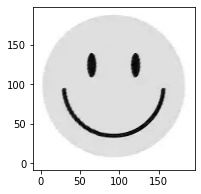

In [44]:
from matplotlib.image import imread
img = imread('smiley.png')
# note: rows x columns x colors (not width x height!)
R = img[:,:,1] # select color channel 2, G
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(R.shape[1]),
np.arange(R.shape[0], 0, -1))
X = np.stack((xx.ravel(), yy.ravel()), axis=1)
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=R.ravel(), marker='.', cmap="Greys_r")
ax.set_aspect('equal')
plt.show()


In [45]:
"""3.2 Read the image dont-own-tv.png and display it in an analogous
fashion. (We will just stay with grayscale images).
"""

'3.2 Read the image dont-own-tv.png and display it in an analogous\nfashion. (We will just stay with grayscale images).\n'

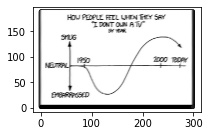

In [46]:
#reading te image file

from matplotlib.image import imread
img = imread('dont-own-tv-small.png')
# note: rows x columns x colors (not width x height!)
R = img[:,:,1] # select color channel 2, G
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(R.shape[1]),
np.arange(R.shape[0], 0, -1))
X = np.stack((xx.ravel(), yy.ravel()), axis=1)
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=R.ravel(), marker='.', cmap="Greys_r")
ax.set_aspect('equal')
plt.show()


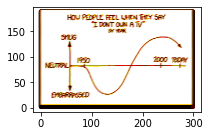

In [47]:
#experimenting with a different colour map

from matplotlib.image import imread
img = imread('dont-own-tv-small.png')
# note: rows x columns x colors (not width x height!)
R = img[:,:,1] # select color channel 2, G
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(R.shape[1]),
np.arange(R.shape[0], 0, -1))
X = np.stack((xx.ravel(), yy.ravel()), axis=1)
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=R.ravel(), marker='.', cmap="hot")
ax.set_aspect('equal')
plt.show()


In [48]:
"""3.3 Now stretch the image vertically (using the stretch-y matrix you
did above) so that it will be square-shaped.
"""

'3.3 Now stretch the image vertically (using the stretch-y matrix you\ndid above) so that it will be square-shaped.\n'

In [49]:
#I am calculating the stretch factor, so finding dimesnsions of image file
img.shape

(189, 300, 3)

In [50]:
#The height is 189 pixels and the width is 300 pixel, so stretch factor = 300/189
stretch_factor = R.shape[1]/R.shape[0]
stretch_factor

1.5873015873015872

In [51]:
# I would now create the stretch matrix to stretch in the y direction with an amount of stretch_factor
Stretch_matrix = np.array([[1,0],[0,stretch_factor]])
Stretch_matrix

array([[1.        , 0.        ],
       [0.        , 1.58730159]])

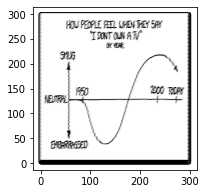

In [52]:
#I would multiply X with the stretch matrix to make the figure square
from matplotlib.image import imread
img = imread('dont-own-tv-small.png')
# note: rows x columns x colors (not width x height!)
R = img[:,:,1] # select color channel 2, G
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(R.shape[1]),
np.arange(R.shape[0], 0, -1))
X = np.stack((xx.ravel(), yy.ravel()), axis=1)
X = X @ Stretch_matrix # multiplying with stretch matrix
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=R.ravel(), marker='.', cmap="Greys_r")
ax.set_aspect('equal')
plt.show()

In [53]:
"""3.4 Zoom onto just the red arrowhead from the image (extract a
slice that just contains the arrowhead), and plot it in a rotated form
so that the arrow points exactly left.
"""

'3.4 Zoom onto just the red arrowhead from the image (extract a\nslice that just contains the arrowhead), and plot it in a rotated form\nso that the arrow points exactly left.\n'

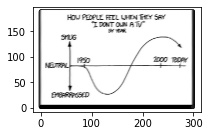

In [54]:
#reading te image file

from matplotlib.image import imread
img = imread('dont-own-tv-small.png')
# note: rows x columns x colors (not width x height!)
R = img[:,:,1] # select color channel 2, G
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(R.shape[1]),
np.arange(R.shape[0], 0, -1))
X = np.stack((xx.ravel(), yy.ravel()), axis=1)
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=R.ravel(), marker='.', cmap="Greys_r")
ax.set_aspect('equal')
plt.show()


In [55]:
#We can find that the arrow head is somewhere between 100 to 150 pixel in y direction; and 250 to 300 in the x direction


In [56]:
img.shape

(189, 300, 3)

In [57]:
#I did various experiments with slicing and found that the red arrow hat is in the following dimension
Q = img[65:80,265:280,1]

In [58]:
Q.shape

(15, 15)

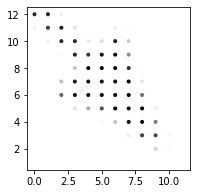

In [59]:
#reading te image file

from matplotlib.image import imread
img = imread('dont-own-tv-small.png')
# note: rows x columns x colors (not width x height!)
Q = img[66:78,268:280,1] # select color channel 2, G; and also slicing the red arrow head
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(Q.shape[1]),
np.arange(Q.shape[0], 0, -1))
X = np.stack((xx.ravel(), yy.ravel()), axis=1)
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=Q.ravel(), marker='.', cmap="Greys_r")
ax.set_aspect('equal')
plt.show()


In [60]:
#We have to rotate it to left. As the question does not mention to take the mirror image, I am rotating it through an angle of 270 degree counter clockwise, creating the rotation matrix
theta_270 = np.radians(-270) #putting angle as -270 degree for rotating
c_270 = np.cos(theta_270)
s_270 = np.sin(theta_270)
Rm_270 = np.array(((c_270,-s_270), (s_270, c_270)))


In [61]:
Rm_270.shape

(2, 2)

In [62]:
Rm_270

array([[-1.8369702e-16, -1.0000000e+00],
       [ 1.0000000e+00, -1.8369702e-16]])

In [63]:
X.shape

(144, 2)

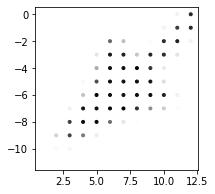

In [64]:
#plotting the rotated image

from matplotlib.image import imread
img = imread('dont-own-tv-small.png')
# note: rows x columns x colors (not width x height!)
Q = img[66:78,268:280,1] # select color channel 2, G; and also slicing the red arrow head
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(Q.shape[1]),
np.arange(Q.shape[0], 0, -1))
X = np.stack((xx.ravel(), yy.ravel()), axis=1)
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
X=X.astype(float)
X = X @ Rm_270
ax.scatter(X[:,0], X[:,1], c=Q.ravel(), marker='.', cmap="Greys_r")
ax.set_aspect('equal')
plt.show()


In [65]:
"""Extra credit: when plotting the arrow, create a red
colormap in a way that the image will be printed in levels of red, not in
grays.
"""

'Extra credit: when plotting the arrow, create a red\ncolormap in a way that the image will be printed in levels of red, not in\ngrays.\n'

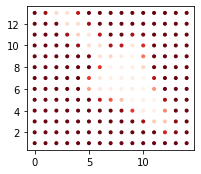

In [66]:
#reading te image file

from matplotlib.image import imread
img = imread('dont-own-tv-small.png')
# note: rows x columns x colors (not width x height!)
Q = img[65:78,265:280,1] # select color channel 2, G; and also slicing the red arrow head
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(Q.shape[1]),
np.arange(Q.shape[0], 0, -1))
X = np.stack((xx.ravel(), yy.ravel()), axis=1)
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=Q.ravel(), marker='.', cmap="Reds")
ax.set_aspect('equal')
plt.show()


In [67]:
cdict = {'red':   ((0.0, 1.0, 1.0), 
                   (0.1, 1.0, 1.0),  # red 
                   (0.4, 1.0, 1.0),  # violet
                   (1.0, 0.0, 0.0)), # blue

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 0.0),
                   (0.1, 0.0, 0.0),  # red
                   (0.4, 1.0, 1.0),  # violet
                   (1.0, 1.0, 0.0))  # blue
          }

ValueError: Invalid RGBA argument: ((0.0, 1.0, 1.0), (0.1, 1.0, 1.0), (0.4, 1.0, 1.0), (1.0, 0.0, 0.0))

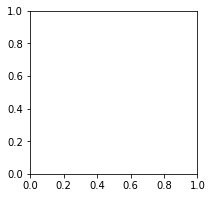

In [68]:
import matplotlib.colors

#reading te image file

from matplotlib.image import imread
img = imread('dont-own-tv-small.png')
# note: rows x columns x colors (not width x height!)
Q = img[65:78,265:280,1] # select color channel 2, G; and also slicing the red arrow head
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(Q.shape[1]),
np.arange(Q.shape[0], 0, -1))
X = np.stack((xx.ravel(), yy.ravel()), axis=1)
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=Q.ravel(), marker='.', cmap=matplotlib.colors.LinearSegmentedColormap.from_list("", [cdict["red"],cdict["green"],cdict["blue"]]))
ax.set_aspect('equal')
plt.show()
